In [1]:
%matplotlib notebook

import math

import sympy

import geometrik.threed as g3d

from goto.globe.plot import GlobePlotMpl

from goto.globe.blip import Blip
import goto.globe.lineto

In [40]:
BOD = Blip(44.828333, -0.715556).as_vector
MXP = Blip(45.63, 8.723056).as_vector
MRS = Blip(43.436667, 5.215).as_vector
LHR = Blip(51.4775, -0.461389).as_vector
LIS = Blip(38.774167, -9.134167).as_vector
RKV = Blip(64.13, -21.940556).as_vector
SYD = Blip(-33.946111, 151.177222).as_vector
PRY = Blip(-25.653611, 28.224167).as_vector
SVO = Blip(55.972778, 37.414722).as_vector
SIN = Blip(1.359167, 103.989444).as_vector

A, B, C = PRY, SVO, SIN

In [41]:
z = 8
line_BA = goto.globe.lineto.LineTo(B, A)
line_BC = goto.globe.lineto.LineTo(B, C)

<IPython.core.display.Javascript object>


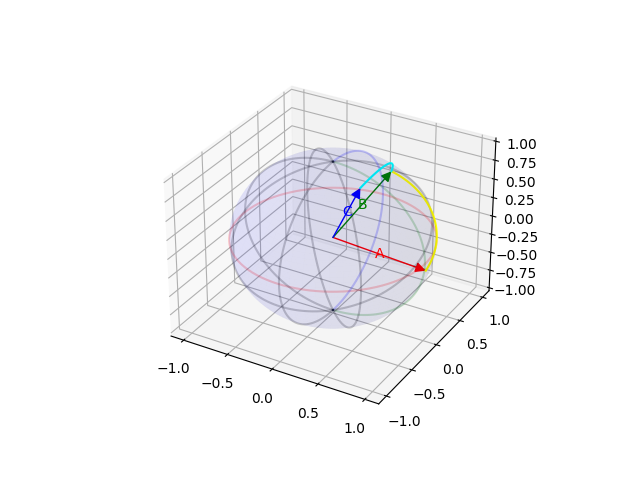

In [42]:
with GlobePlotMpl() as u :
    u.add_point(A, "A", 'r')
    u.add_point(B, "B", 'g')
    u.add_point(C, "C", 'b')
    u.add_line(A, B, 'yellow')
    u.add_line(B, C, 'cyan')

Given 3 cities $A$, $B$ and $C$ which make two segments: one from $A$ to $B$ and one from $B$ to $C$

$Q$ is a vector which bissect $\widehat{ABC}$ and is perpendicular to $B$

In [43]:
q = line_BA.Ly.signed_angle_to(line_BC.Ly, B)
q

1.3848410085789995

In [44]:
Q = (line_BC.Ly + line_BA.Ly ).normalized()
Q.x, Q.y, Q.z

(0.24661112454861925, 0.8429853628065601, -0.47807805988432217)

<IPython.core.display.Javascript object>


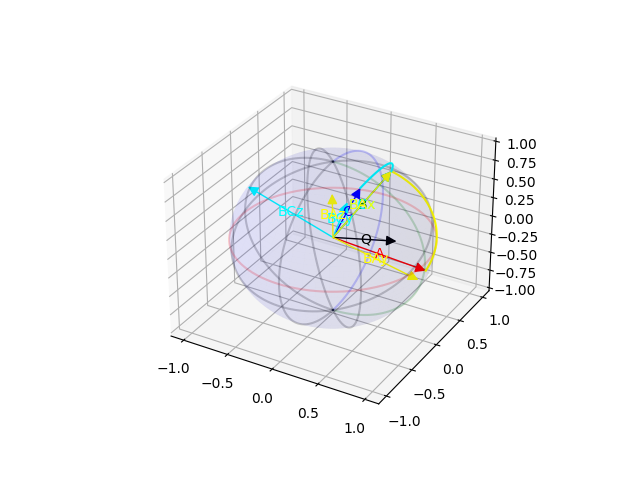

In [45]:
with GlobePlotMpl() as u :
    u.add_point(A, "A", 'r')
    u.add_point(B, "B", 'g')
    u.add_point(C, "C", 'b')
    u.add_point(Q, "Q", 'k')
    u.add_point(line_BC.Lx, "BCx", 'cyan')
    u.add_point(line_BC.Ly, "BCy", 'cyan')
    u.add_point(line_BC.Lz, "BCz", 'cyan')
    u.add_point(line_BA.Lx, "BAx", 'yellow')
    u.add_point(line_BA.Ly, "BAy", 'yellow')
    u.add_point(line_BA.Lz, "BAz", 'yellow')
    u.add_line(B, A, 'yellow')
    u.add_line(B, C, 'cyan')


We can compute the inner sides of the corridor, given the specified widths

In [46]:
w = math.copysign(1.0, q)

On défini le point $V$ comme un point construit à partir de $B$ et de $Q$

Les résultats utilisés ici sont expliqués dans le notebook `turn_3pt_wlf`

In [47]:
R1 = -(A * Q)**2 / (
    A.y**2*(-1+B.y**2) +
    2*A.x*A.z*B.x*B.z +
    2*A.y*B.y*(A.x*B.x+A.z*B.z) +
    A.z**2*(-1+B.z**2) -
    A.x**2*(B.y**2+B.z**2)
)
R1

0.5924427331763411

In [48]:
d = 0.25124028407072047

In [49]:
t = math.acos(math.sqrt(math.cos(d)**2 - R1)/math.sqrt(1 - R1))
t
# t = 0.4

0.3999999999999997

In [50]:
V = B * math.cos(t) + Q * math.sin(t)
E = line_BA.projection(V)
F = line_BC.projection(V)
B.angle_to(V)

0.3999999999999997

<IPython.core.display.Javascript object>


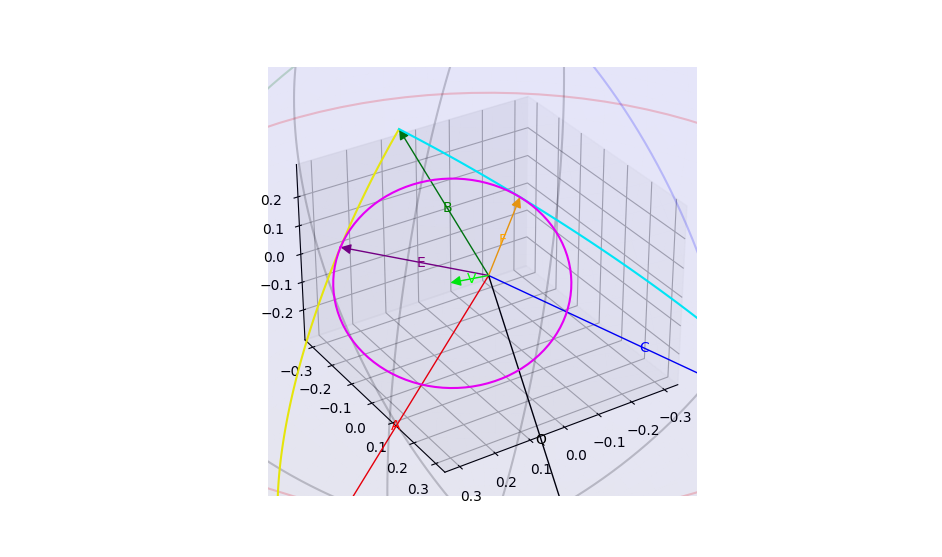

In [52]:
with GlobePlotMpl() as u :
    u.add_point(A, "A", 'r')
    u.add_point(B, "B", 'g')
    u.add_point(C, "C", 'b')
    u.add_point(E, "E", 'purple')
    u.add_point(F, "F", 'orange')
    u.add_point(Q, 'Q', 'k')
    u.add_point(V, 'V', 'lime')
    u.add_line(A, B, 'yellow')
    u.add_line(B, C, 'cyan')
    u.add_circle(V, E, 'magenta')


In [24]:
V.angle_to(E)

0.25124028407072047

In [25]:
V.angle_to(F)

0.25124028407072

In [ ]:
with UnitSpherePlot() as u :
    u.add_point(A, "A", 'r')
    u.add_point(B, "B", 'g')
    u.add_point(C, "C", 'b')
    u.add_point(Q, 'Q', 'k')
    u.add_point(E, 'E', 'purple')
    u.add_point(F, 'F', 'purple')
    u.add_point(V, 'V', 'lime')
    u.add_point(I, 'I', 'magenta')
    u.add_arc(A, B, 'yellow')
    u.add_arc(B, C, 'cyan')
    u.add_arc(point_ab, point_ba, 'orange')
    u.add_arc(point_bc, point_cb, 'dodgerblue')
    u.add_circle(V, E, 'hotpink')

In [38]:
V.x, V.y, V.z

(0.5054064703093324, 0.6414288716538898, 0.5771770113044001)

In [39]:
E.x, E.y, E.z

(0.6515110640724986, 0.4417379388874316, 0.6167665090928689)

In [ ]:
B.x, B.y, B.z

In [ ]:
I.x, I.y, I.z

In [ ]:
Q.x, Q.y, Q.z

In [ ]:
P1, P2, R1

In [ ]:
with UnitSpherePlot() as u :
    u.add_point(A, "A", 'r')
    u.add_point(B, "B", 'g')
    u.add_point(C, "C", 'b')
    u.add_point(E, 'E', 'purple')
    u.add_point(F, 'F', 'purple')
    u.add_point(V, 'V', 'lime')    
    u.add_arc(A, B, 'yellow')
    u.add_arc(B, C, 'cyan')
    u.add_circle_part(V, E, F, 'hotpink')
    u.add_arc(point_ab, point_ba, 'orange')
    u.add_arc(point_bc, point_cb, 'dodgerblue')

In [ ]:
Ez, Fz, Vz = lineto_BA.make_joint(lineto_BC)

In [ ]:
Ez, E

In [ ]:
Fz, F

In [ ]:
Vz, V